In [1]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

## Iris dataset

In [4]:
iris = sns.load_dataset("iris")

In [5]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print(iris.species.value_counts())

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


In [7]:
le = LabelEncoder()

In [8]:
le.fit(iris['species'])
print(list(le.classes_))

['setosa', 'versicolor', 'virginica']


In [9]:
iris['species'] = le.transform(iris['species'])

In [10]:
print(iris['species'][0:5]) 
print(iris['species'][50:55]) 
print(iris['species'][100:105])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64
100    2
101    2
102    2
103    2
104    2
Name: species, dtype: int64


In [11]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_matrix = pd.DataFrame.as_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']])

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
cluster_model = KMeans(n_clusters=3, random_state=10)

In [14]:
print(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)


In [15]:
cluster_model.fit(iris_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [16]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
cluster_labels = cluster_model.fit_predict(iris_matrix)

In [18]:
i=iris

In [19]:
i.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [20]:
i['pred'] = cluster_labels

In [21]:
i.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0


/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


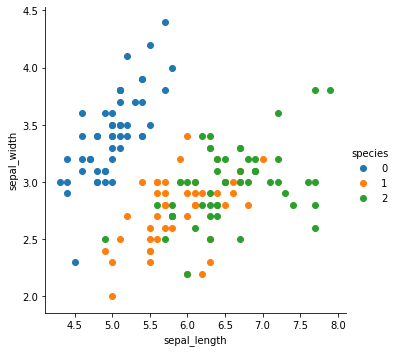

In [22]:
sns.FacetGrid(i, hue = "species", size = 5).map(plt.scatter, "sepal_length","sepal_width").add_legend()

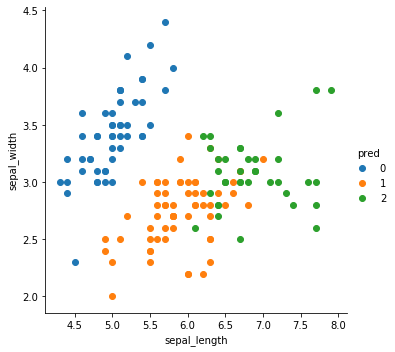

In [23]:
sns.FacetGrid(i, hue = "pred", size = 5).map(plt.scatter, "sepal_length","sepal_width").add_legend()

### Performance measurement

In [24]:
sm.accuracy_score(iris.species, cluster_model.labels_)

0.8933333333333333

In [25]:
adjusted_rand_score(iris.species, cluster_model.labels_)

0.7302382722834697

In [26]:
sm.confusion_matrix(iris.species, cluster_model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

## Glass_Class dataset

In [27]:
glass = pd.read_csv("glassClass.csv")

In [28]:
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [29]:
le.fit(glass['Type'])
print(list(le.classes_))

[1, 2, 3, 5, 6, 7]


In [30]:
glass['Type'] = le.transform(glass['Type'])

In [31]:
X = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [32]:
g_matrix = pd.DataFrame.as_matrix(X)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
cluster_model = KMeans(n_clusters = 2, random_state = 10)

In [34]:
cluster_model.fit(g_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [35]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:
cluster_labels = cluster_model.fit_predict(g_matrix)

In [37]:
g = glass

In [38]:
g['pred'] = cluster_labels

In [39]:
g.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0,0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0,0


/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


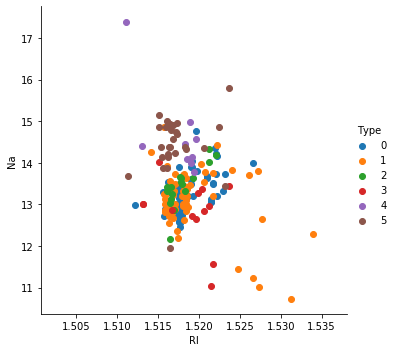

In [40]:
sns.FacetGrid(g, hue = "Type", size = 5).map(plt.scatter, "RI", "Na").add_legend()

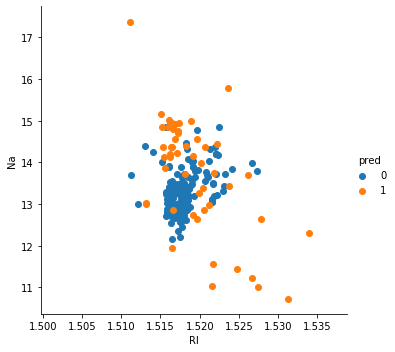

In [41]:
sns.FacetGrid(g, hue = "pred", size = 5).map(plt.scatter, "RI", "Na").add_legend()

In [42]:
sm.accuracy_score(g.Type, cluster_model.labels_)

0.37850467289719625

In [43]:
adjusted_rand_score(g.Type, cluster_model.labels_)

0.20078348455794232

### Elbow Method..

In [44]:
from scipy.spatial.distance import cdist

In [45]:
colors = ['b', 'g', 'r'] 
markers = ['o', 'v', 's']

In [46]:
distortions = []

In [47]:
K = range(1,10)

In [48]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(g_matrix) 
    kmeanModel.fit(g_matrix)
    distortions.append(sum(np.min(cdist(g_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / 
                   g_matrix.shape[0])

In [49]:
distortions

[2.066097473697294,
 1.4929384190842658,
 1.3000695641030862,
 1.2194020679675006,
 1.0756182842174733,
 1.0080919049384471,
 0.9548622389489747,
 0.9046708727011975,
 0.8462288474827239]

<function matplotlib.pyplot.show(*args, **kw)>

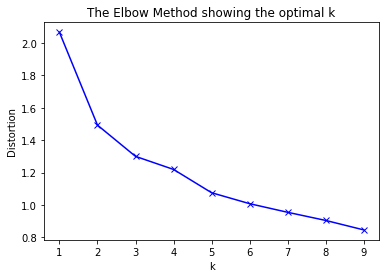

In [50]:
#Plot the elbow
plt.plot(K, distortions, 'bx-')
#X-axis: k, y-axis: distortions, bx-: blue line with “x” as markings on it. 
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show

#### ---> Use the optimum value of 'k' from above graph and use it in above cluster algorithm

## Gaussian Mixture


In [54]:
from sklearn import mixture

In [51]:
wine = pd.read_csv("wineQualityReds.csv")
wine.head(6)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [52]:
wine = wine.drop('Unnamed: 0', axis = 1)

In [53]:
X_wine = wine.drop("quality", axis = 1)

In [56]:
cluster_model = mixture.GaussianMixture(n_components = 4,covariance_type = 'full')

In [57]:
print(cluster_model)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


In [58]:
w_matrix = pd.DataFrame.as_matrix(X_wine)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [59]:
cluster_model.fit(w_matrix)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [61]:
y_gmm = cluster_model.predict(X_wine)

In [62]:
print(y_gmm)

[1 2 2 ... 1 1 0]


In [63]:
import seaborn as sns

In [64]:
wine['cluster'] = y_gmm

In [65]:
wine.head(n=6)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


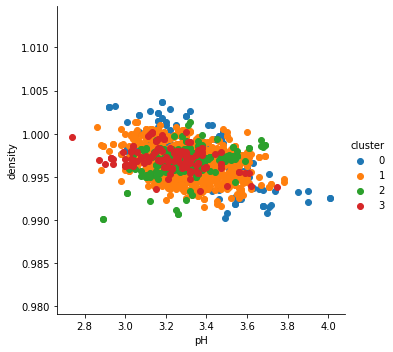

In [66]:
sns.FacetGrid(wine, hue="cluster", size=5).map(plt.scatter, "pH","density").add_legend()

In [67]:
from sklearn import metrics

In [68]:
sm.accuracy_score(wine.quality, y_gmm)

0.001876172607879925

In [69]:
metrics.adjusted_rand_score(wine.quality, y_gmm)

0.02182614279423334

## Hierarchical Clustering

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
glass = pd.read_csv("glassClass.csv")

In [88]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
pred    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [75]:
le = LabelEncoder()

In [76]:
le.fit(glass['Type'])

LabelEncoder()

In [77]:
print(list(le.classes_))

[1, 2, 3, 5, 6, 7]


In [78]:
glass['Type'] = le.transform(glass['Type'])

In [79]:
X = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [80]:
g_matrix = pd.DataFrame.as_matrix(X)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [100]:
cluster_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage= 'ward')

### parameters desc:
n_clusters - The number of clusters to find.
affinity - Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
"manhattan", "cosine", or 'precomputed'.
If linkage is "ward", only "euclidean" is accepted.
linkage - Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
ward minimizes the variance of the clusters being merged.
- average uses the average of the distances of each observation of
the two sets.
- complete or maximum linkage uses the maximum distances between
all observations of the two sets.
- single uses the minimum of the distances between all observations
of the two sets.

In [101]:
cluster_labels = cluster_model.fit_predict(g_matrix)

In [102]:
cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 5, 5, 4, 4,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4,
       2, 2, 2, 2, 3, 4, 4, 4, 3, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [103]:
g = glass

In [104]:
g['pred'] = cluster_labels

In [105]:
g

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,0,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,0,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,0,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,0,1


In [106]:
sm.accuracy_score(g.Type, cluster_model.labels_)

0.3130841121495327

In [107]:
metrics.adjusted_rand_score(g.Type, cluster_model.labels_)

0.2620306253377113

### Visualization

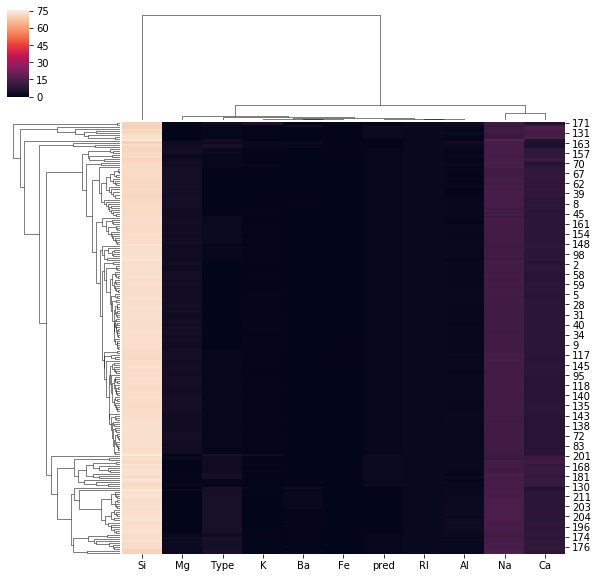

In [98]:
cg = sns.clustermap(glass)

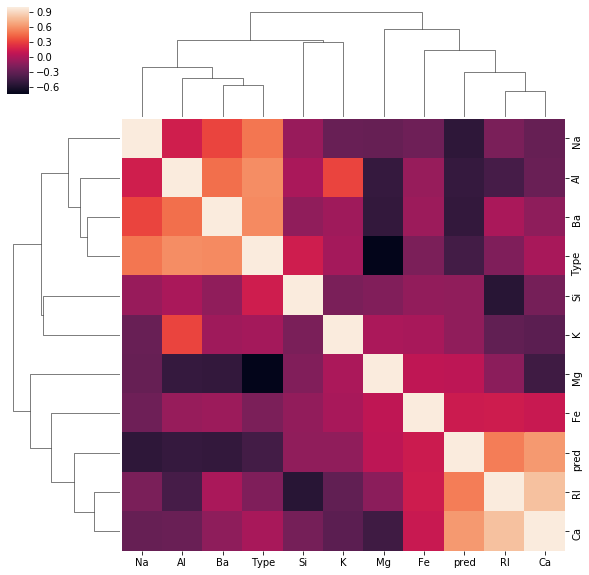

In [99]:
cg = sns.clustermap(glass.corr())

#### Drawing Dendogram in Python for Happy 2015 dataset

In [108]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [109]:
happy = pd.read_csv("happy2015.csv")

In [110]:
happy.head(7)

,Country,Region,Rank,HappinessScore,StandardError,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,DystopiaResidual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570


In [112]:
X1 = happy[['HappinessScore','Economy(GDP per Capita)','Family','Health(Life Expectancy)', 
            'Freedom','Trust(Government Corruption)','Generosity','DystopiaResidual']]

In [113]:
X1.head(5)

,HappinessScore,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,DystopiaResidual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [114]:
#Generate the linkage matrix.
Z = linkage(X1, 'ward')
#‘ward' is one of the methods that can be used to calculate the distance between newly formed clusters

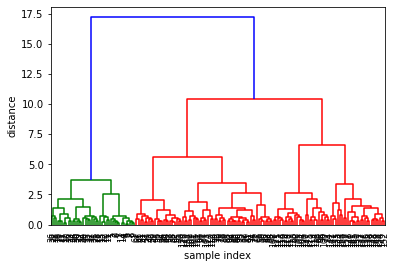

In [116]:
dendrogram(Z,
leaf_rotation=90., # rotates the x axis labels 
leaf_font_size=8., # font size for the x axis labels
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

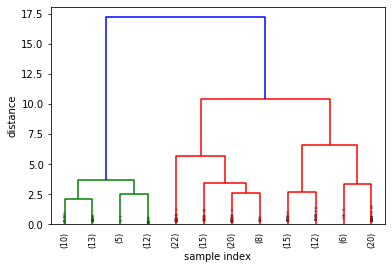

In [119]:
# Use the “truncated mode” to view the last few clusters of the dataset
dendrogram(Z, truncate_mode='lastp', p=12,
leaf_rotation=90., # rotates the x axis labels 
leaf_font_size=8., # font size for the x axis labels
show_contracted=True,
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [122]:
#Add Rank to X and try now
X2 = happy[['Rank','HappinessScore','Family', 'Health(Life Expectancy)','Economy(GDP per Capita)',
'Freedom','Trust(Government Corruption)', 'Generosity', 'DystopiaResidual']]

In [123]:
Z = linkage(X2, method ='complete')

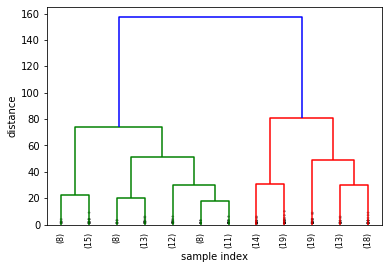

In [124]:
# Use the “truncated mode” to view the last few clusters of the dataset
dendrogram(Z, truncate_mode='lastp', p=12,
leaf_rotation=90., # rotates the x axis labels 
leaf_font_size=8., # font size for the x axis labels
show_contracted=True,
)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

--fcluster

In [125]:
from scipy.cluster.hierarchy import fcluster

In [128]:
distanceMatrix = pd.DataFrame.as_matrix(X2)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [129]:
assignments = fcluster(linkage(distanceMatrix, method='complete'),4,'distance')

In [131]:
cluster_output = pd.DataFrame({'Rank':X2.Rank.tolist() , 'cluster':assignments})

In [136]:
cluster_output

,Rank,cluster
0,1,48
1,2,48
2,3,48
3,4,48
4,5,50
5,6,50
6,7,50
7,8,50
8,9,49
9,10,49


In [134]:
new = pd.merge(cluster_output, happy, on = 'Rank')

In [135]:
new.head()

,Rank,cluster,Country,Region,HappinessScore,StandardError,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,DystopiaResidual
0,1,48,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,48,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,48,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,48,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,50,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
fcluster